### import the liabaries

In [29]:


import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Load the data

In [2]:
df = pd.read_csv('D:\\client\\programmelocality\\Program_Locality.csv', encoding='ISO-8859-1')

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,ProgramID,ProgramCode,LocalityID,LocalityName,StartDate,EndDate,PracticeID,PracticeCode,TinID,TaxID,StateID,StateCode,StateName,CountyID,CountyName,ZipCode,LocationName
0,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Baltimore Washington Medical Center (ADV_23)
1,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Crain Towers (ADV_27)
2,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,PET Center @ BWMC (ADV_40)
3,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Advanced Radiology Glen Burnie (ADV_12)
4,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Aeillo Center at BWMC (ADV_22)


In [5]:
df.shape

(5500, 17)

In [6]:
# Replace problematic characters
df.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)

#### Dynamic EndDate Handling

In [30]:

current_date = datetime.now().strftime('%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
df['EndDate'] = df['EndDate'].fillna(current_date)

In [33]:
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')

#### Filter active records (optional, for training)

In [31]:

df = df[df['EndDate'] >= current_date]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4597 entries, 46 to 5499
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProgramID        3294 non-null   float64       
 1   ProgramCode      3294 non-null   object        
 2   LocalityID       3294 non-null   object        
 3   LocalityName     3294 non-null   object        
 4   StartDate        3294 non-null   datetime64[ns]
 5   EndDate          4597 non-null   datetime64[ns]
 6   PracticeID       3294 non-null   float64       
 7   PracticeCode     3294 non-null   object        
 8   TinID            3294 non-null   float64       
 9   TaxID            3294 non-null   object        
 10  StateID          3294 non-null   float64       
 11  StateCode        3294 non-null   object        
 12  StateName        3294 non-null   object        
 13  CountyID         3294 non-null   float64       
 14  CountyName       3294 non-null   object     

In [9]:
df.isnull().sum()

ProgramID       1303
ProgramCode     1303
LocalityID      1303
LocalityName    1303
StartDate       1303
EndDate            0
PracticeID      1303
PracticeCode    1303
TinID           1303
TaxID           1303
StateID         1303
StateCode       1303
StateName       1303
CountyID        1303
CountyName      1303
ZipCode         1303
LocationName    1303
dtype: int64

In [10]:
# Filter rows where ProgramID is null
null_programid = df[df[['ProgramID', 'ProgramCode', 'LocalityID']].isnull()]

# Display rows with null ProgramID
print(null_programid)

      ProgramID ProgramCode LocalityID LocalityName StartDate EndDate  \
0           NaN         NaN        NaN          NaN       NaN     NaN   
1           NaN         NaN        NaN          NaN       NaN     NaN   
2           NaN         NaN        NaN          NaN       NaN     NaN   
3           NaN         NaN        NaN          NaN       NaN     NaN   
4           NaN         NaN        NaN          NaN       NaN     NaN   
...         ...         ...        ...          ...       ...     ...   
5495        NaN         NaN        NaN          NaN       NaN     NaN   
5496        NaN         NaN        NaN          NaN       NaN     NaN   
5497        NaN         NaN        NaN          NaN       NaN     NaN   
5498        NaN         NaN        NaN          NaN       NaN     NaN   
5499        NaN         NaN        NaN          NaN       NaN     NaN   

      PracticeID PracticeCode  TinID TaxID  StateID StateCode StateName  \
0            NaN          NaN    NaN   NaN      

In [11]:
# Drop rows where all values are NaN
df = df.dropna(how='all')

# Drop rows where specific critical columns have NaN
critical_columns = ['ProgramID', 'ProgramCode', 'LocalityID', 'LocalityName', 'StartDate', 'EndDate', 'PracticeID', 'PracticeCode', 'TinID', 'TaxID', 'StateID', 'StateCode', 'StateName', 'CountyID', 'CountyName', 'ZipCode', 'LocationName']
df = df.dropna(subset=critical_columns)

In [12]:
df.isnull().sum()

ProgramID       0
ProgramCode     0
LocalityID      0
LocalityName    0
StartDate       0
EndDate         0
PracticeID      0
PracticeCode    0
TinID           0
TaxID           0
StateID         0
StateCode       0
StateName       0
CountyID        0
CountyName      0
ZipCode         0
LocationName    0
dtype: int64

In [13]:
# Normalize categorical fields (e.g., stripping extra spaces)
df['StateCode'] = df['StateCode'].str.strip()
df['CountyName'] = df['CountyName'].str.strip()
df['LocationName'] = df['LocationName'].str.strip()

In [14]:
df.head()

,ProgramID,ProgramCode,LocalityID,LocalityName,StartDate,EndDate,PracticeID,PracticeCode,TinID,TaxID,StateID,StateCode,StateName,CountyID,CountyName,ZipCode,LocationName
0,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Baltimore Washington Medical Center (ADV_23)
1,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Crain Towers (ADV_27)
2,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,PET Center @ BWMC (ADV_40)
3,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Advanced Radiology Glen Burnie (ADV_12)
4,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Aeillo Center at BWMC (ADV_22)


In [15]:
df.shape

(4197, 17)

#### Feature Engineering for Location Clustering and Demographic Patterns

Feature engineering is essential to enhance the dataset and improve the accuracy of AI predictions for insurance practices. Here's how to derive additional insights, focusing on location clustering and demographic patterns:

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [94]:
from sklearn.preprocessing import LabelEncoder

# Example categorical column: 'StateName'
label_encoder = LabelEncoder()

# Apply LabelEncoder only to categorical columns
df['StateName'] = label_encoder.fit_transform(df['StateName'])

# For other categorical columns, apply the same
df['CountyName'] = label_encoder.fit_transform(df['CountyName'])

#### define cluster

In [95]:
# Define the function
def add_location_clusters(df):
    # Select geographic features
    location_features = df[['StateName', 'StateCode', 'CountyID', 'ZipCode']].copy()

    # Handle missing values for numeric and categorical data separately
    location_features['CountyID'] = location_features['CountyID'].fillna(0)  # Replace missing numeric values with 0
    location_features['ZipCode'] = location_features['ZipCode'].fillna(0)  # Replace missing numeric values with 0
    location_features['StateName'] = location_features['StateName'].fillna('Unknown')  # Replace missing strings
    location_features['StateCode'] = location_features['StateCode'].fillna('Unknown')  # Replace missing strings

    # Encode categorical data
    label_encoder = LabelEncoder()
    location_features['StateName'] = label_encoder.fit_transform(location_features['StateName'])
    location_features['StateCode'] = label_encoder.fit_transform(location_features['StateCode'])



    # Standardize the numeric data
    scaler = StandardScaler()
    location_features_scaled = scaler.fit_transform(location_features)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
    df['LocationCluster'] = kmeans.fit_predict(location_features_scaled)

    return df, location_features_scaled

# Load your data
df = pd.read_csv('D:\\client\\programmelocality\\Program_Locality.csv', encoding='ISO-8859-1')

# Apply the function
df, location_features_scaled = add_location_clusters(df)

# Verify the output
print(df[['StateName', 'StateCode', 'LocationCluster']].head())
print(location_features_scaled.shape)


  StateName StateCode  LocationCluster
0  Maryland        MD                0
1  Maryland        MD                0
2  Maryland        MD                0
3  Maryland        MD                0
4  Maryland        MD                0
(5500, 4)


In [96]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [97]:
import matplotlib.pyplot as plt

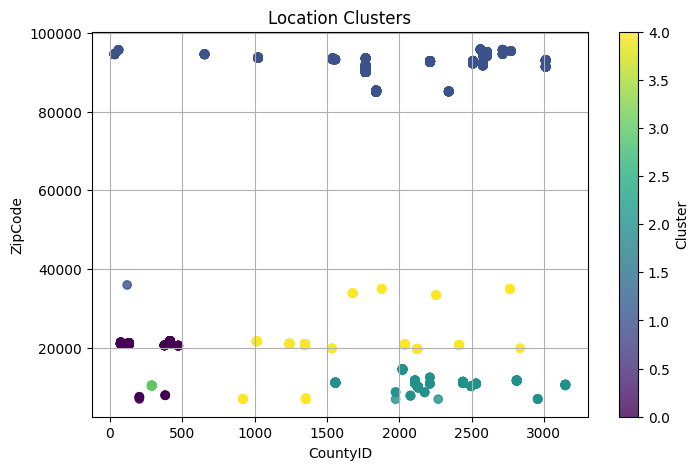

In [98]:
def visualize_clusters(df):
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(
        df['CountyID'], 
        df['ZipCode'], 
        c=df['LocationCluster'], 
        cmap='viridis', 
        alpha=0.8
    )
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('CountyID')
    plt.ylabel('ZipCode')
    plt.title('Location Clusters')
    plt.grid(True)
    plt.show()

# Example Usage
visualize_clusters(df)



#### Key Observations:
1.	Cluster Separation:
o	Points grouped by similar colors indicate locations that share similar geographic features and are grouped into the same cluster.
o	Overlap or proximity between clusters might suggest shared characteristics or data points that are not well-separated by the current feature set.

2.	ZIP Code Patterns:
o	Higher ZIP codes seem to cluster distinctly (e.g., the yellow cluster at the top).
o	Lower ZIP codes (e.g., dark blue points) are grouped closer together.

3.	CountyID Influence:
o	Clusters are spread across the CountyID range, suggesting county-level data impacts the cluster formation.


Possible Insights:
•	This clustering can reveal geographic groupings, such as regions or states that share similar characteristics.
•	If these clusters correspond to business logic (e.g., insurance regions or demographics), they can help refine predictions or operational strategies.


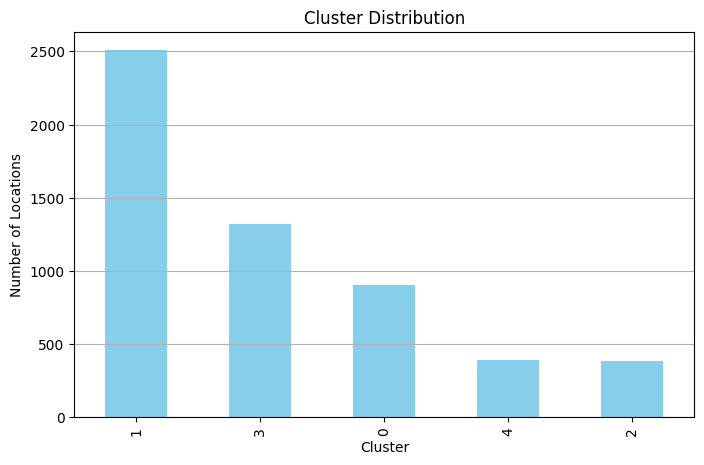

In [99]:
def cluster_distribution(df):
    cluster_counts = df['LocationCluster'].value_counts()
    cluster_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
    plt.xlabel('Cluster')
    plt.ylabel('Number of Locations')
    plt.title('Cluster Distribution')
    plt.grid(axis='y')
    plt.show()

# Example Usage
cluster_distribution(df)

In [22]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(location_features_scaled, df['LocationCluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8249173888170266


####Silhouette Score Interpretation:
Score Range:

-1: Poor clustering; data points are likely assigned to the wrong clusters.
0: Overlapping clusters; data points are on the border between clusters.
1: Perfect clustering; data points are well within their respective clusters and far from others.

Your Score:

A score of 0.8249 is very high, indicating:
Clusters are well-separated from each other.
Data points are closely grouped within their respective clusters.
There’s minimal overlap or ambiguity between clusters.

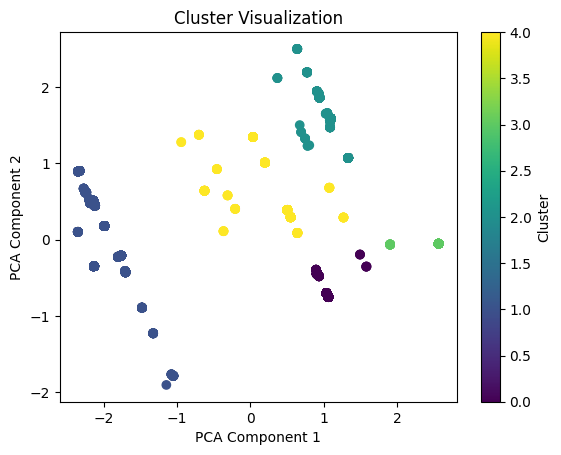

In [100]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(location_features_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['LocationCluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [101]:
import sklearn
print(sklearn.__version__)

1.6.1


In [102]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df['LocationCluster'] = kmeans.fit_predict(location_features_scaled)

# Access inertia to evaluate clustering performance
print("K-Means Inertia:", kmeans.inertia_)

K-Means Inertia: 869.3801337509524


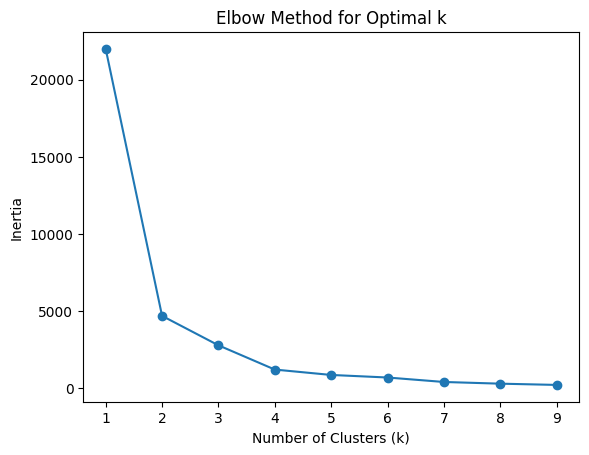

In [103]:

inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(location_features_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Inertia Value (869.38) at k=5
At k=5, the inertia value of 869.38 aligns well with the elbow method.
This suggests that the clustering is effective and further increasing the number of clusters may not add significant value.
If this inertia is combined with a high silhouette score (as previously calculated, 0.82), it confirms that the clusters are both compact and well-separated.

In [104]:
df.head()

,ProgramID,ProgramCode,LocalityID,LocalityName,StartDate,EndDate,PracticeID,PracticeCode,TinID,TaxID,StateID,StateCode,StateName,CountyID,CountyName,ZipCode,LocationName,LocationCluster
0,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Baltimore Washington Medical Center (ADV_23),0
1,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Crain Towers (ADV_27),0
2,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,PET Center @ BWMC (ADV_40),0
3,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Advanced Radiology Glen Burnie (ADV_12),0
4,38.0,ADV,1900-06-06,ADV,2000-01-01,2024-12-31,1.0,ADV,25.0,52-2055746,27.0,MD,Maryland,75.0,Anne Arundel County,21061.0,Aeillo Center at BWMC (ADV_22),0


#### Handle missing values

In [105]:
df['LocationCluster'].unique()

array([0, 4, 1, 3, 2], dtype=int32)

In [106]:
!pip install xgboost

In [107]:
import xgboost as xgb

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


###  Data Preparation
#### Encode target variables

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
# Handle Missing Values
def handle_missing_values(df):
    # Numeric columns: Fill NaN with the mean
    num_imputer = SimpleImputer(strategy='mean')
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

    # Categorical columns: Fill NaN with "Unknown"
    cat_imputer = SimpleImputer(strategy='most_frequent')
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

    return df

# Apply missing value handling
df = handle_missing_values(df)

In [111]:
label_enc_program = LabelEncoder()
label_enc_locality = LabelEncoder()
df['ProgramCode'] = label_enc_program.fit_transform(df['ProgramCode'])
df['LocalityID'] = label_enc_locality.fit_transform(df['LocalityID'])



In [114]:
# Encode categorical features
def encode_categorical_features(df, categorical_columns):
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders


# Scale numeric features using MinMaxScaler
def scale_numeric_features(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Define categorical columns
categorical_columns = ['StateName', 'StateCode']

# Encode the features
df_encoded, encoders = encode_categorical_features(df, categorical_columns)

#### Features and Targets

In [115]:

features = ['StateName', 'StateCode', 'CountyID', 'ZipCode', 'LocationCluster']
X = df[features]
y_program = df_encoded['ProgramCode']
y_locality = df_encoded['LocalityID']

#### Train-Test Split

In [116]:

X_train, X_test, y_train_program, y_test_program = train_test_split(X, y_program, test_size=0.2, random_state=42)
X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X, y_locality, test_size=0.2, random_state=42)

## Model Development
#### Random Forest for ProgramCode

In [117]:
rf_program = RandomForestClassifier(random_state=42)
rf_program.fit(X_train, y_train_program)
y_pred_program_rf = rf_program.predict(X_test)

In [124]:
# Combine y_train_loc and y_test_loc to fit LabelEncoder on all possible labels
all_labels = np.concatenate([y_train_loc, y_test_loc])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)  # Fit on the combined data

# Now, transform y_train_loc and y_test_loc separately
y_train_loc = label_encoder.transform(y_train_loc)
y_test_loc = label_encoder.transform(y_test_loc)

In [125]:
print(y_train_loc[:10])  # First 10 encoded values
print(label_encoder.classes_)  # Original class labels

[ 6 23  6 54 17 28 29  6  6 47]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


#### Gradient Boosted Trees for LocalityID

In [126]:
xgb_locality = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_locality.fit(X_train_loc, y_train_loc)
y_pred_locality_xgb = xgb_locality.predict(X_test_loc)

In [128]:

# Step 4: Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")

# Evaluate ProgramCode Model
evaluate_model(y_test_program, y_pred_program_rf, "Random Forest (ProgramCode)")

# Evaluate LocalityID Model
evaluate_model(y_test_loc, y_pred_locality_xgb, "Gradient Boosted Trees (LocalityID)")

Random Forest (ProgramCode) Performance:
Accuracy: 0.3618
Precision: 0.3371
Recall: 0.3618
F1-score: 0.3288

Gradient Boosted Trees (LocalityID) Performance:
Accuracy: 0.2891
Precision: 0.2698
Recall: 0.2891
F1-score: 0.2717



In [129]:
# Save models for reuse
import joblib
# Save the model and preprocessing objects
joblib.dump(xgb_locality, 'xgb_locality_model.pkl')
joblib.dump(encoders, 'encoders.pkl')
joblib.dump(MinMaxScaler().fit(X), 'scaler.pkl')  # Save the scaler

['scaler.pkl']